# DTSC-670 Foundations of Machine Learning
## Assignment 2
### Name: (Please Enter Your Name Before Submitting)

## Copyright & Academic Integrity Notice
<span style="color:red">The assignment materials provided are exclusively for students officially enrolled in the course and are intended solely for purposes associated with the course. It is strictly prohibited to distribute these materials to others. Students are expressly forbidden from uploading these documents, parts of this assignment, or solutions to any external platforms such as websites, GitHub repositories, or personal websites.</span>

<span style="color:red">By submitting your document to CodeGrade, you are acknowledging that you fully understand the Academic Integrity policy as outlined in both the Program Handbook and the course syllabus. All submitted work must be solely your own, and any form of collaboration is strictly prohibited. You must not seek solutions online or submit them to any external websites. At the end of the term, plagiarism tracking software will be used for this assignment. Violations of the Academic Integrity policy will result in failure on the assignment, failure in the class, and/or dismissal from the program.</span> 

## Student Learning Objectives

- Develop proficiency in utilizing fundamental Scikit-learn functions, gaining familiarity with their syntax and applications
- Strengthen the understanding of the machine learning process, including exploring and preparing the data
- Demonstrate the ability to successfully construct and employ a basic linear regression model


## CodeGrade
This assignment will be automatically graded through CodeGrade, and you will have unlimited submission attempts. To ensure successful grading, please follow these instructions carefully: Name your notebook as `assignment_2.ipynb` before submission, as CodeGrade requires this specific filename for grading purposes. Additionally, make sure there are no errors in your notebook, as CodeGrade will not be able to grade it if errors are present. Before submitting, we highly recommend restarting your kernel and running all cells again to ensure that there will be no errors when CodeGrade runs your script.

## Assignment Overview
For this assignment your objective is to utilize Scikit-learn functions, including constructing a data pipeline, to preprocess data for running a multiple linear regression model. We will create a machine learning model to predict apartment prices using the available features. 

This assignment will follow steps outlined in the machine learning checklist provided in the textbook's appendix. It's important to acknowledge that this assignment is meant to stay at a simple, broad overview and in a real-world scenario, extensive data exploration, diverse data refinement techniques, experimentation with multiple models, and meticulous model refinement would be conducted before reaching the final evaluation stage. 

### Data
This assignment uses a dataset of advertised apartment rentals in the USA, and the original dataset can be found on [UC Irvine's Machine Learning Repository](http://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified).  However, please use the dataset provided in Brightspace as some values have been changed and features deleted. The dataset provided through Brightspace contains 10,000 instances and 10 columns.

The columns in the file are as follows:

    - id : unique identifier of apartment
    - latitude : latitude where the apartment is located
    - longitude : longitude where the apartment is located
    - bathrooms : number of bathrooms
    - bedrooms : number of bedrooms
    - fee : Y/N does apartment have fee?
    - has_photo : Y/N does apartment listing have photo?
    - pets_allowed : what pets are allowed dogs/cats etc.
    - square_feet : size of the apartment in square feet
    - price : rental price of apartment (This will be our target)

### Assignment Instructions
Walk through the rest of the assignment, completing the exercises as indicated.  As you read through the markdown comments, the provided code, and create your own code, think about how each section fits into the overall machine learning process.  

Once you have completed all the tasks, you are ready to submit your assignment to CodeGrade for testing. Please restart your notebook's kernel and run your code from the beginning to ensure there are no error messages. Once you have verified that the code runs without any issues, submit your .ipynb notebook file to CodeGrade for evaluation. Your notebook should be called `assignment_2.ipynb`. You have unlimited attempts for this assignment.

### Table of Contents 
1. [Standard Imports](#import)
2. [Get the Data](#data)
3. [Explore the Data](#explore)
4. [Prepare the Data](#prepare)
5. [Model Selection & Evaluation](#model_selection)
6. [Final Model Evaluation](#final_model)
 

## Standard Imports<a name="import"></a>
Run the code block below to import your standard imports and setup the notebook for CodeGrade grading.

In [1]:
# standard imports
import pandas as pd
import numpy as np

# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', 20)

<span style="color:red">Important Reminder: While progressing through the assignment, you'll encounter the need to import different Scikit-learn functions to fulfill the tasks. We deliberately refrain from indicating precisely when these imports should be made, encouraging you to naturally develop the habit of incorporating them when needed. </span>

The choice is subjective, but some experts recommend consolidating all import statements at the outset of your notebook. This approach helps others using the notebook easily identify and access the necessary imports, if any are required.

## Get the Data<a name="data"></a>

**Exercise 1:** In the code block below, import the `apartments_for_rent.csv` file and save the DataFrame as `apartments`.


In [2]:
apartments = pd.read_csv('apartments_for_rent.csv')


Let's begin by examining fundamental details about the dataset. First, we will review the columns, check the total count of non-null entries, and analyze the data types associated with each column.

In [3]:
# check basic info about dataset
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   latitude      10000 non-null  float64
 2   longitude     10000 non-null  float64
 3   bathrooms     9967 non-null   float64
 4   bedrooms      9994 non-null   float64
 5   fee           10000 non-null  object 
 6   has_photo     10000 non-null  object 
 7   pets_allowed  5837 non-null   object 
 8   square_feet   10000 non-null  int64  
 9   price         10000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 781.4+ KB


In [4]:
apartments.columns

Index(['id', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'fee',
       'has_photo', 'pets_allowed', 'square_feet', 'price'],
      dtype='object')

The dataset comprises 10,000 instances across 10 columns. Notably, the `bathrooms`, `bedrooms`, and `pets_allowed` columns contain instances with missing data.

Upon inspection of the `id` and `fee` columns, it becomes evident that these columns either offer irrelevant information for our machine learning objective or exhibit consistent values across all instances.

In [5]:
# The "id" column contains information that is not pertinent to our current task.
apartments['id'].head()

0    5668626895
1    5664597177
2    5668626833
3    5659918074
4    5668626759
Name: id, dtype: int64

In [6]:
# the "fee" column exhibits uniform values across all instances within the dataset.
apartments['fee'].value_counts()

No    10000
Name: fee, dtype: int64

**Exercise 2:** Drop the `id` and `fee` columns from the dataset making sure that you save your changes back to the `apartments` DataFrame.

In [7]:
apartments.drop(['id', 'fee'], axis=1, inplace=True)

apartments.head()


,latitude,longitude,bathrooms,bedrooms,has_photo,pets_allowed,square_feet,price
0,38.9057,-76.9861,NaN,0.0,Thumbnail,NaN,101,790
1,37.9680,-87.6621,NaN,1.0,Thumbnail,NaN,106,425
2,38.8910,-77.0816,1.0,0.0,Thumbnail,NaN,107,1390
3,47.6160,-122.3275,1.0,0.0,Thumbnail,NaN,116,925
4,38.8738,-77.1055,NaN,0.0,Thumbnail,NaN,125,880


**Exercise 3:** Before diving deeper into the data, we should stop and create a training and a test set.
1) Since we are trying to predict the price of an apartment, save the `price` column as a Series named `price_target`.
2) Drop the `price` column from the `apartments` DataFrame and save the remaining columns as a DataFrame named `apartments_features`.
3) Utilize Scikit-learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)  function, employing the `apartments_features` and `price_target` variables, to partition the data into a training set and a test set. Allocate 80% of the instances for training and 20% for testing. Set the random_state to 42 to ensure reproducibility of our results.  Assign the resulting DataFrames the following names: `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
from sklearn.model_selection import train_test_split

price_target = apartments['price']

# Step 2: Drop the price column from the apartments DataFrame
# and save the remaining columns as a DataFrame named apartments_features
apartments_features = apartments.drop('price', axis=1)

# Step 3: Use train_test_split function
X_train, X_test, y_train, y_test = train_test_split(apartments_features, price_target, 
                                                    test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


C:\Users\Haneef\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


X_train shape: (8000, 7)
X_test shape: (2000, 7)
y_train shape: (8000,)
y_test shape: (2000,)


In [9]:
### ENTER CODE HERE ###

In [10]:
### ENTER CODE HERE ###

## Explore the Data<a name="explore"></a>
Now that we have our training set, let's explore the data in more detail.  We'll begin by checking the descriptive statistics for our numerical data.

In [11]:
# check descriptive statistics
X_train.describe()

,latitude,longitude,bathrooms,bedrooms,square_feet
count,8000.000000,8000.000000,7974.000000,7994.000000,8000.000000
mean,37.638087,-94.763954,1.382242,1.750188,945.434500
std,5.523883,15.818233,0.612889,0.950951,532.799944
min,21.315500,-158.022100,1.000000,0.000000,106.000000
25%,33.595300,-101.858700,1.000000,1.000000,650.000000
50%,38.648700,-93.737500,1.000000,2.000000,804.000000
75%,41.271500,-82.383300,2.000000,2.000000,1100.000000
max,61.594000,-70.191600,8.000000,9.000000,11318.000000


By examining these statistics, you can gather insights into the data's central tendencies, spread, distribution, and potential anomalies. This aids in making informed decisions during data preprocessing, feature engineering, and model selection process.

Observe that the maximum values for bathrooms, bedrooms, and square_feet appear unusually high when considering a typical apartment. In a practical situation, it would be prudent to pause and conduct a more thorough investigation. This could involve examining whether there are potential data entry inaccuracies or the presence of outliers that require removal before proceeding with further model development.

Let's continue exploring our data and see where the apartments are located in the US.

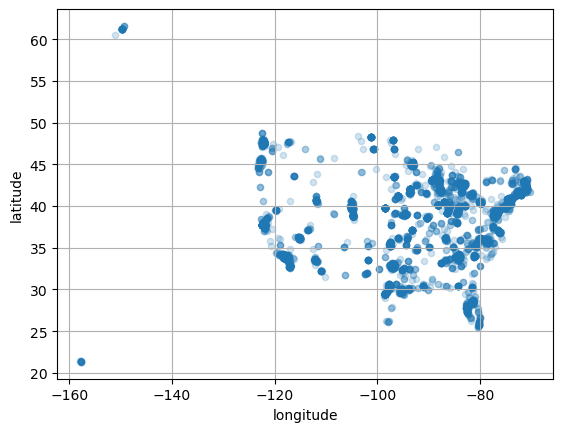

In [12]:
import matplotlib.pyplot as plt

# create scatterplot of all rentals
X_train.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

To analyze our categorical features, we can inspect the distribution of values by examining their respective value counts percentages.

In [13]:
#  check value count percentages for "has_photo" feature
X_train['has_photo'].value_counts(normalize=True)

Thumbnail    0.89150
Yes          0.09075
No           0.01775
Name: has_photo, dtype: float64

Again, in a real-world scenario, we should consider delving deeper to determine whether a distinction exists between the values labeled as "Thumbnail" and those labeled as "Yes" in the data. Should no substantial differentiation be evident, it might be appropriate to consolidate these into a single category. Additionally, take note of the minimal percentage of apartments characterized by "No" values. Consequently, it could be worthwhile to evaluate whether inclusion of this column in the final model contributes significant value or if it's more appropriate to omit it.

In [14]:
#  check value count percentages for "pets_allowed" feature
X_train['pets_allowed'].value_counts(normalize=True)

Cats,Dogs    0.897220
Cats         0.080586
Dogs         0.022193
Name: pets_allowed, dtype: float64

Now we can plot select numerical features and the rental prices against each other.

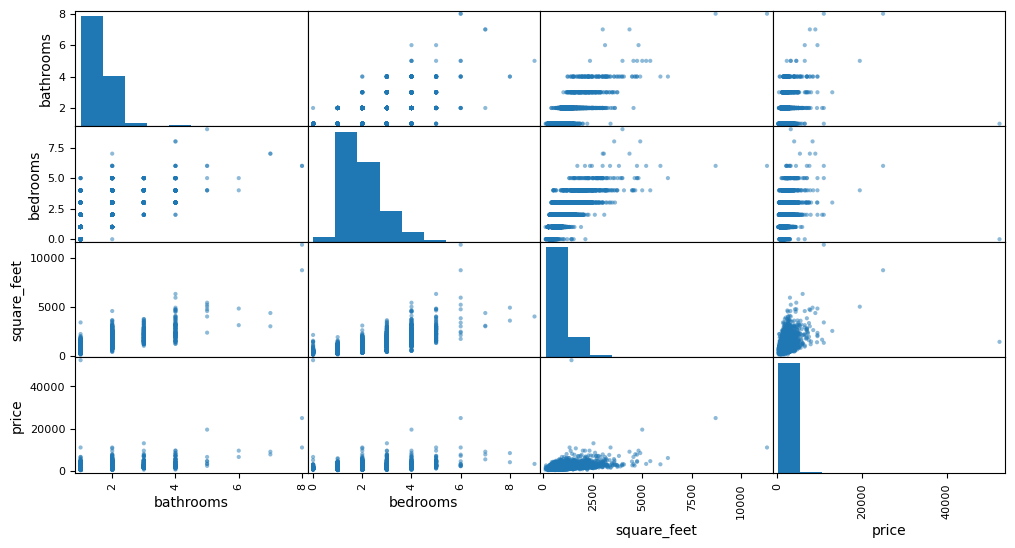

In [15]:
# plot select numeric values
from pandas.plotting import scatter_matrix

# select only a few numeric attributes from the training data
col_attributes = ['bathrooms','bedrooms','square_feet']

# combine training features and target into DataFrame
combined_df = pd.concat([X_train[col_attributes], y_train], axis=1)

# plots scatterplots and histograms when variable is compared against itself
scatter_matrix(combined_df, figsize=(12, 6))
plt.show()

Apart from the outliers we previously addressed, it's apparent that there are potentially outliers concerning the price target as well, warranting further investigation. Analyzing these visual representations, the square feet feature seems to hold promise as a potential important predictor for price, which is logical.

Finally, we can compute the standard correlation coefficient between the attributes.

In [16]:
# select attributes
col_attributes_2 = ['latitude','longitude','bathrooms','bedrooms','square_feet']

# create new combined DataFrame that includes longitude and latitude
combined_df_2 = pd.concat([X_train[col_attributes_2], y_train], axis=1)

# check correlations
corr_matrix = combined_df_2.corr()
corr_matrix["price"].sort_values(ascending=False)

price          1.000000
square_feet    0.456036
bathrooms      0.394160
bedrooms       0.298313
latitude       0.017938
longitude     -0.181943
Name: price, dtype: float64

While there are certainly more aspects to investigate, we'll proceed to the subsequent stage of the machine learning process – starting the data preparation for the machine learning model.

## Prepare the Data<a name="prepare"></a>

### Pipeline

You are now going to prepare your data for use in a machine learning model.  For our numeric data, you will fill in any missing values and then scale your data (Note: Feature scaling isn't always necessary for linear regression but can be advantageous in some cases. Gradient descent optimization benefits from scaling for quicker convergence and better performance. However, with closed-form solutions like the normal equation, scaling isn't vital as the algorithm manages varied feature scales inherently).

To ensure that our steps are executed in the correct order, and to assist us in preparing our test set, you will create a pipeline for your transformations.

**Exercise 4:** 
1) Utilize Scikit-Learn's [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) function to generate a pipeline named `num_pipeline`.  
2) Within this pipeline, begin by incorporating a [SimpleImputer(https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) transformation using the `median` strategy. 
3) Next, add a [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transformation into the pipeline


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline named num_pipeline
# Incorporate a SimpleImputer transformation with the median strategy
# Add a StandardScaler transformation into the pipeline
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)


In the California Housing example, we only used the pipeline for our numeric data.  However, we can just as easily use it for our categorical data as well.  Let's setup another pipeline to impute the missing value for our categorical data (in our case, remember that the `pets_allowed` column has missing data) and then one-hot encode the data, making sure to drop the first column.

**Exercise 5:** 
1) Utilize Scikit-Learn's `make_pipeline` function to generate a pipeline named `cat_pipeline`.  
2) We are going to assume that missing values for the `pets_allowed` column means that the apartment doesn't allow pets. Within this pipeline, begin by incorporating a `SimpleImputer` transformation using the `constant` strategy along with a `fill_value` with the string "No_Pets".
3) Next, add an [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) class to the pipeline, making sure that the `drop` parameter is set to "first".


In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Step 1: Utilize make_pipeline function to create a pipeline named cat_pipeline
# Step 2: Incorporate a SimpleImputer transformation with constant strategy and fill_value "No_Pets"
# Step 3: Add an OneHotEncoder to the pipeline with drop="first"
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='No_Pets'),
    OneHotEncoder(drop='first')
)


### Column Transformer

Next, you will create a Column Transformer to pass your numeric data to the `num_pipeline` and your categorical features to the `cat_pipeline` you created above.

**Exercise 6:**
1) Create a list of your numerical column names (in this order): 'latitude', 'longitude', 'bathrooms', 'bedrooms', and 'square_feet'. Name this list `num_attributes`.
2) Create a list of your categorical column names (in this order): 'has_photo' and 'pets_allowed'. Name this list `cat_attributes`.
3) Utilize Scikit-learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) function to create a transformer that:
    - Directs the numeric data through the previously defined `num_pipeline`.
    - Directs the categorical features through the previously defined `cat_pipeline`.
    - Name this ColumnTransformer object `preprocessing`.
4) Invoke the fit_transform() method on the `X_train` dataset to generate the preprocessed data. Store the resulting output in a variable named `X_train_prepared`.

In [19]:
from sklearn.compose import ColumnTransformer

# Step 1: Create a list of numerical column names
num_attributes = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'square_feet']

# Step 2: Create a list of categorical column names
cat_attributes = ['has_photo', 'pets_allowed']

# Step 3: Utilize ColumnTransformer to create a preprocessing pipeline
preprocessing = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_attributes),
        ('cat', cat_pipeline, cat_attributes)
    ]
)

# Step 4: Invoke the fit_transform() method on the X_train dataset
X_train_prepared = preprocessing.fit_transform(X_train)

# Optionally, you can check the shape of the preprocessed data
print(X_train_prepared.shape)


(8000, 10)


## Model Selection & Evaluation<a name="model_selection"></a>
With our data now prepared, we can proceed to train a couple of models for predicting apartment prices. Let's begin by employing a standard linear regression model.

**Exercise 7:**
1) Utilizing Scikit-learn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class, create an instance of the class and assign the model the name `lin_reg`.
2) Train (aka "fit") the `lin_reg` model using the `X_train_prepared` and `y_train` data

In [20]:
from sklearn.linear_model import LinearRegression

# Step 1: Create an instance of the LinearRegression class
lin_reg = LinearRegression()

# Step 2: Train the lin_reg model using the X_train_prepared and y_train data
lin_reg.fit(X_train_prepared, y_train)




LinearRegression()

With the model trained, it's time to assess its performance using Scikit-learn's `cross_val_score` function. Run the cell below to execute a ten-fold cross-validation utilizing your `lin_reg` model, and apply the `neg_root_mean_squared_error` scoring parameter. Keep in mind that Scikit-learn employs utility functions, where higher scores are preferable, hence the necessity to negate the scores (notice the `-` sign in the code).

In [21]:
# perform a 10-fold cross validation using the `lin_reg` model

from sklearn.model_selection import cross_val_score

lin_reg_rmses = -cross_val_score(lin_reg, X_train_prepared, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [22]:
pd.Series(lin_reg_rmses).describe()

count      10.000000
mean      889.858340
std       376.497817
min       656.297734
25%       703.231636
50%       752.891579
75%       904.683403
max      1920.415202
dtype: float64

Observe that the average RMSE score across the cross-validation folds is rather unsatisfactory, especially when considering the median price of apartments in the training data, which is only $1275. Presently, the data seems inadequate for effectively predicting apartment prices. However, it's worthwhile to proceed and attempt another machine learning algorithm to see if there are any improvements. 

Let's run a Random Forest algorithm to see what happens.  At this time, don't worry about how the Random Forest algorithm works.  You will learn about this algorithm later. Note: These next two cells may take a few minutes to complete running.

In [23]:
from sklearn.ensemble import RandomForestRegressor

# instantiate a RandomForestRegressor class
forest_reg = RandomForestRegressor(random_state=42) 

# fit the model
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# cross validation
forest_rmses = -cross_val_score(forest_reg, X_train_prepared, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

# check cross validation scores
pd.Series(forest_rmses).describe()

count      10.000000
mean      692.806541
std       414.544265
min       399.456773
25%       504.282052
50%       595.845346
75%       652.569025
max      1837.508391
dtype: float64

The Random Forest algorithm resulted in a substantial reduction of over 22% in the average RMSE score, which is a positive outcome. However, it's worth noting that the overall RMSE remains relatively high when compared to the median value of apartment prices. 

In a real-world scenario, it would be advisable to explore additional machine learning algorithms and consider several strategies to enhance the model's performance such as possibly increasing the quantity of data, increasing the number of features (there were a number of features removed from the original dataset for this assignment), exploring various feature engineering techniques, and fine-tuning the hyperparameters of our models.

## Final Model Evaluation<a name="final_model"></a>
We are now ready to assess our model's performance on the test set, utilizing the previously established Random Forest model. It is necessary that we apply any data transformations we performed on the training data to the testing data. It is crucial to emphasize that we should solely apply transformations to the testing data without using the "fit_transform" method, as we want to exclusively use the information derived from the training data for this transformation process.

**Exercise 8:**
1) Utilizing the previously established `preprocessing` ColumnTransformer, apply transformations to your `X_test` data, and label the resulting dataset as `X_test_prepared`. It is essential that you use the transform method and refrain from using the fit_transform method on your testing data.
2) With the pre-fitted `forest_reg` model, make predictions using the `X_test_prepared` dataset and store these predictions as a variable called `final_predictions`.
3) Utilizing Scikit-learn's [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function, calculate the root mean squared error (RMSE) by passing your y_test and final_predictions, making sure to set the `squared` parameter to `False`.  Round the RMSE score to 2 decimal places. Save this score as `final_rmse`.

In [25]:
from sklearn.metrics import mean_squared_error

# Step 1: Apply transformations to X_test data using the preprocessing ColumnTransformer
X_test_prepared = preprocessing.transform(X_test)

# Step 2: Make predictions using the pre-fitted forest_reg model on X_test_prepared
final_predictions = forest_reg.predict(X_test_prepared)

# Step 3: Calculate the RMSE
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse = round(final_rmse, 2)

# Optionally, you can print the RMSE score
print("Final RMSE:", final_rmse)


Final RMSE: 464.09


Congratulations on successfully completing the assignment! Throughout this task, you acquired and explored your dataset. By implementing pipelines, you streamlined the data preparation process, greatly simplifying the transformation of your test data. You went on to develop and assess two models for predicting apartment prices. Great job, and we hope this assignment has been a valuable learning experience!